In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Definir el directorio de trabajo
os.chdir("C:\\Users\\c-lop\\Documents\\GitHub\\Radioterapia_SS\\Desplazamiento_camilla")

# Cargar datos desde un archivo CSV
datos = pd.read_csv("colchones.csv")

# Verificar la estructura del dataframe
print(datos.info())

# Convertir las columnas de errores a valores numéricos, reemplazando "n.d." y "n.i." por NaN
errores_col = ["vrt", "lng", "lat", "cabeceo", "balanceo", "rot"]

for col in errores_col:
    datos[f'{col}_num'] = pd.to_numeric(datos[col].replace(["n.d.", "n.i."], np.nan), errors='coerce')

# Verificar el dataframe actualizado
print(datos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  246 non-null    object
 1   tipo                246 non-null    object
 2   region/tipo_cancer  246 non-null    object
 3   uso_v               246 non-null    int64 
 4   fase                246 non-null    object
 5   total_frac          246 non-null    int64 
 6   fraccion            246 non-null    int64 
 7   tipo_objeto         246 non-null    object
 8   fecha               246 non-null    object
 9   hora                246 non-null    object
 10  vrt                 246 non-null    object
 11  lng                 246 non-null    object
 12  lat                 246 non-null    object
 13  cabeceo             246 non-null    object
 14  balanceo            246 non-null    object
 15  rot                 246 non-null    object
dtypes: int64(3), object(13)
me

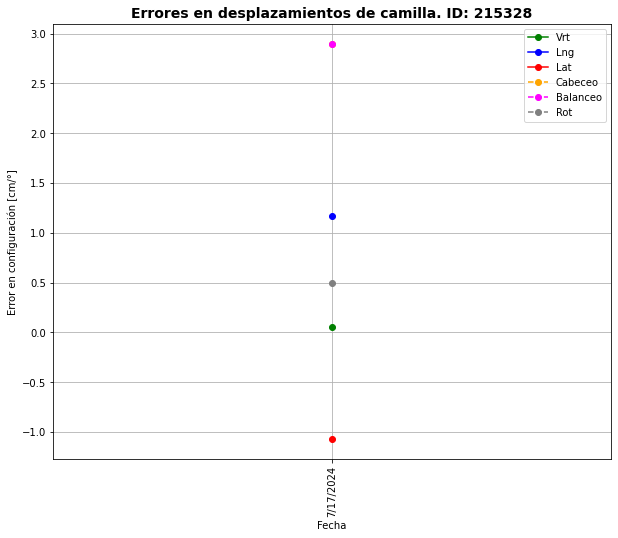

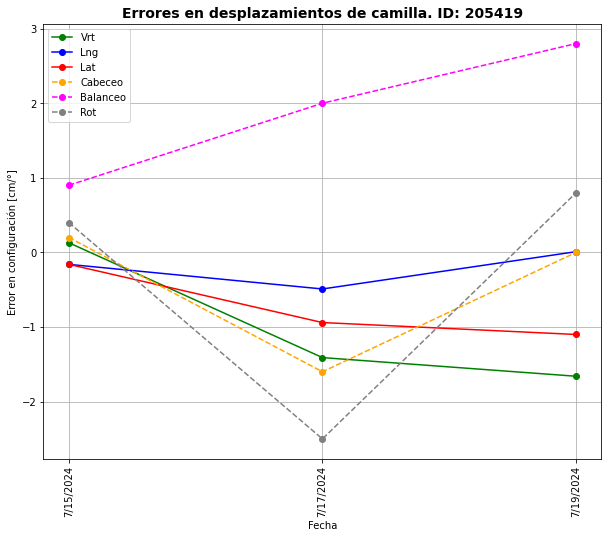

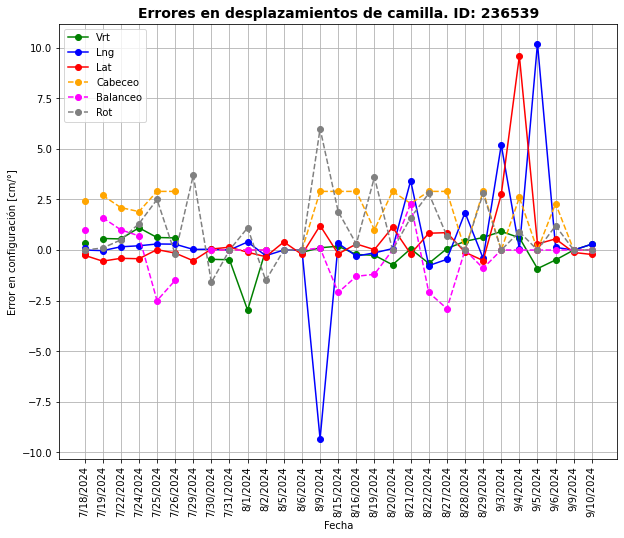

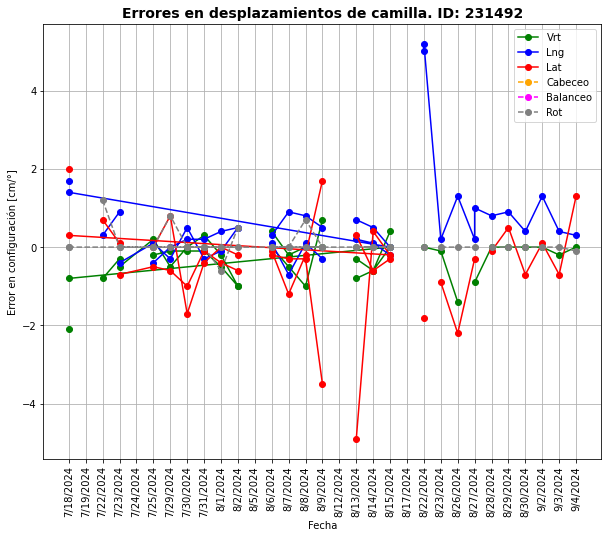

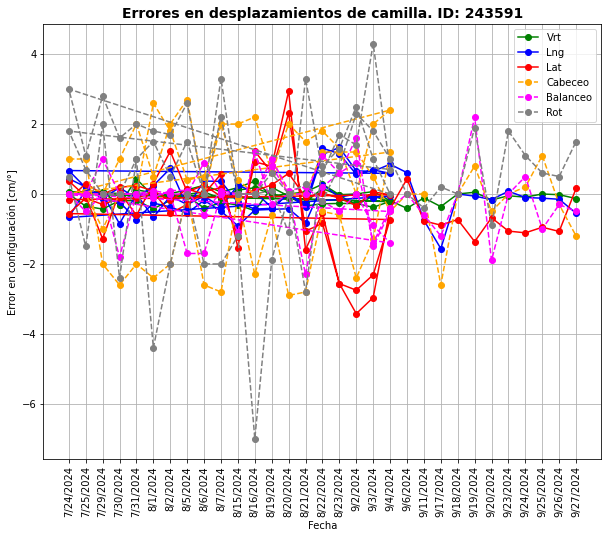

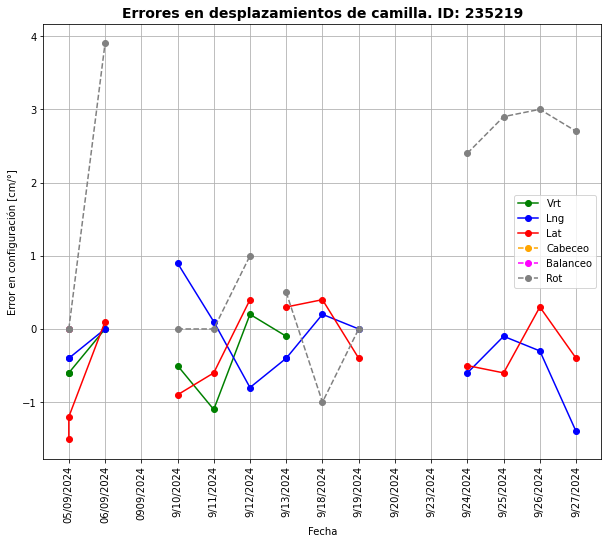

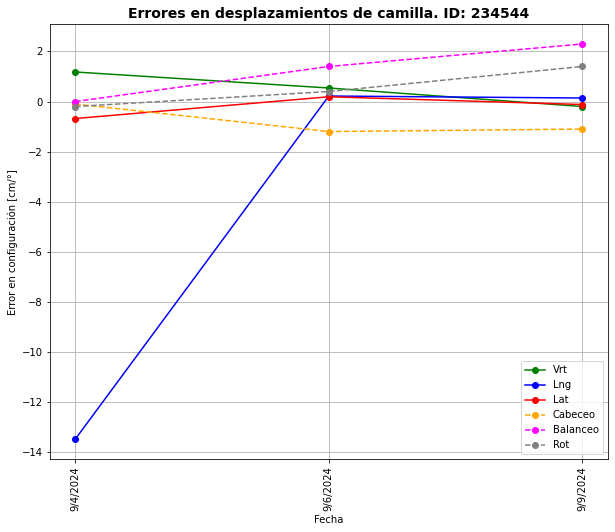

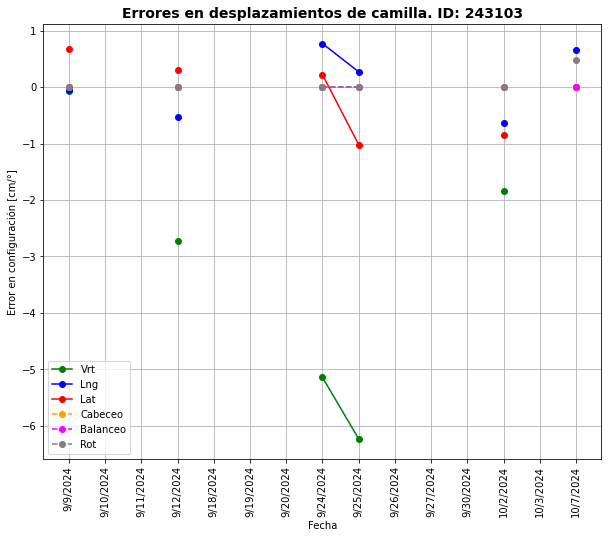

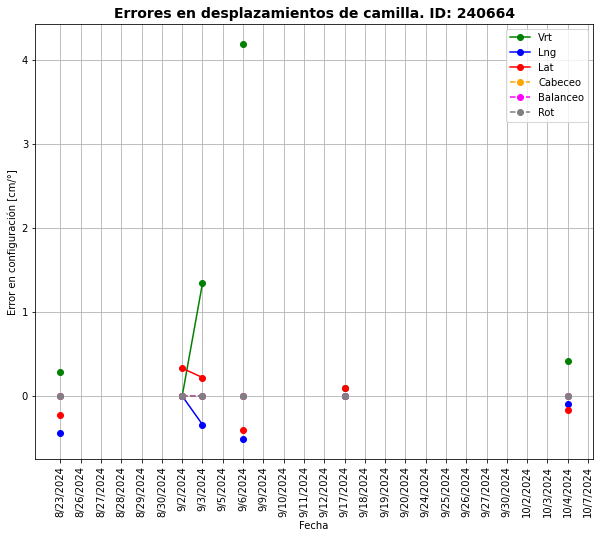

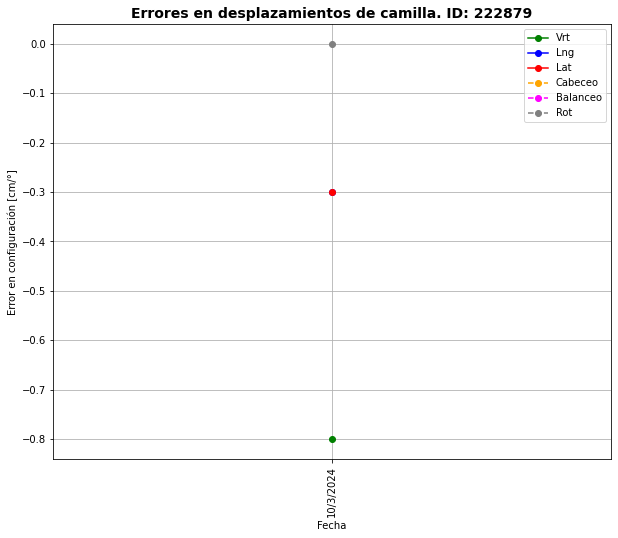

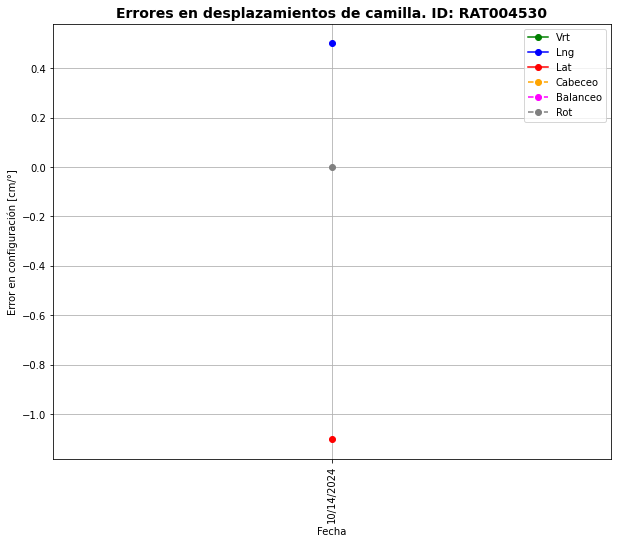

In [3]:
# Obtener los IDs de pacientes únicos
ids_pacientes = datos['id'].unique()

# Crear gráficos para cada paciente
for id_f in ids_pacientes:
    datos_paciente = datos[datos['id'] == id_f]

    plt.figure(figsize=(10, 8))
    
    # Gráfico de errores lineales
    plt.plot(datos_paciente['fecha'], datos_paciente['vrt_num'], label='Vrt', color='green', marker='o', linestyle='-')
    plt.plot(datos_paciente['fecha'], datos_paciente['lng_num'], label='Lng', color='blue', marker='o', linestyle='-')
    plt.plot(datos_paciente['fecha'], datos_paciente['lat_num'], label='Lat', color='red', marker='o', linestyle='-')
    
    # Gráfico de errores angulares (líneas punteadas)
    plt.plot(datos_paciente['fecha'], datos_paciente['cabeceo_num'], label='Cabeceo', color='orange', marker='o', linestyle='--')
    plt.plot(datos_paciente['fecha'], datos_paciente['balanceo_num'], label='Balanceo', color='magenta', marker='o', linestyle='--')
    plt.plot(datos_paciente['fecha'], datos_paciente['rot_num'], label='Rot', color='gray', marker='o', linestyle='--')
    
    # Personalización del gráfico
    plt.title(f"Errores en desplazamientos de camilla. ID: {id_f}", fontsize=14, fontweight="bold")
    plt.xlabel("Fecha")
    plt.ylabel("Error en configuración [cm/°]")
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    plt.grid()
    
    # Guardar el gráfico
    # plt.savefig(f"grafico_errores_{id_f}.jpg", bbox_inches='tight')
    plt.show()

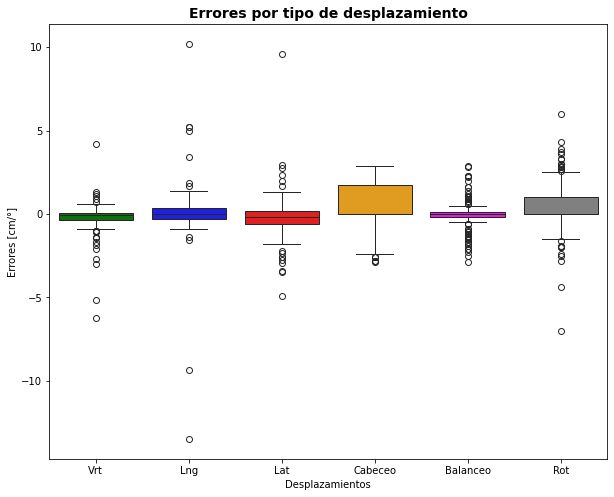

In [4]:
# Definir los colores para cada tipo de desplazamiento
colores = {
    "Vrt": "green", 
    "Lng": "blue", 
    "Lat": "red", 
    "Cabeceo": "orange", 
    "Balanceo": "magenta", 
    "Rot": "gray"
}

# Transformar el dataframe para poder hacer el boxplot
datos_long = datos.melt(id_vars=['id', 'fecha'], 
                        value_vars=['vrt_num', 'lng_num', 'lat_num', 'cabeceo_num', 'balanceo_num', 'rot_num'],
                        var_name='Desplazamiento', value_name='Error')

# Cambiar los nombres de las columnas para que coincidan con los originales
datos_long['Desplazamiento'] = datos_long['Desplazamiento'].map({
    'vrt_num': 'Vrt', 'lng_num': 'Lng', 'lat_num': 'Lat', 
    'cabeceo_num': 'Cabeceo', 'balanceo_num': 'Balanceo', 'rot_num': 'Rot'
})

plt.figure(figsize=(10, 8))
sns.boxplot(x='Desplazamiento', y='Error', data=datos_long, hue='Desplazamiento', palette=colores, dodge=False)
plt.title("Errores por tipo de desplazamiento", fontsize=14, fontweight="bold")
plt.xlabel("Desplazamientos")
plt.ylabel("Errores [cm/°]")
plt.legend([],[], frameon=False)

# plt.savefig("boxplot_desplazamientos.svg", bbox_inches='tight')
plt.show()

C:\Users\c-lop\AppData\Local\Temp\ipykernel_17320\2542587265.py:20: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  conteo_totales['tipo'] = conteo_totales['tipo'].replace({


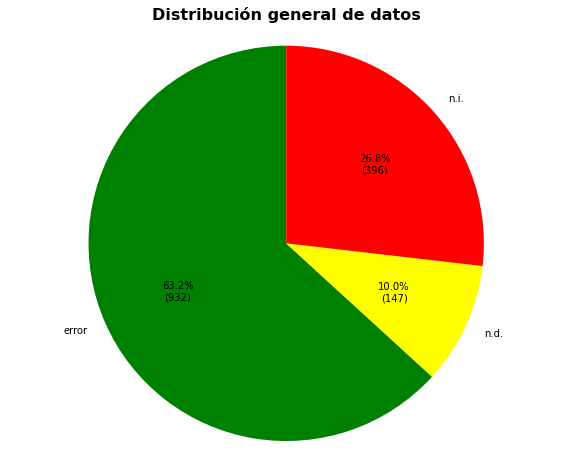

In [5]:
# Recuento de valores por cada desplazamiento
conteo_totales = pd.DataFrame()

# Columnas de errores
errores_col = ["vrt", "lng", "lat", "cabeceo", "balanceo", "rot"]

for col in errores_col:
    conteo = pd.DataFrame({
        'tipo': [col],
        'error': [(~datos[col].isin(["n.d.", "n.i."])).sum()],
        'n.d.': [(datos[col] == "n.d.").sum()],
        'n.i.': [(datos[col] == "n.i.").sum()]
    })
    conteo_totales = pd.concat([conteo_totales, conteo], ignore_index=True)

# Ordenar y renombrar los tipos de desplazamiento
conteo_totales['tipo'] = pd.Categorical(conteo_totales['tipo'], 
                                        categories=errores_col, 
                                        ordered=True)
conteo_totales['tipo'] = conteo_totales['tipo'].replace({
    'vrt': 'Vrt', 'lng': 'Lng', 'lat': 'Lat', 
    'cabeceo': 'Cabeceo', 'balanceo': 'Balanceo', 'rot': 'Rot'
})

# Convertir el dataframe en formato largo
conteo_largo = pd.melt(conteo_totales, id_vars='tipo', value_vars=['error', 'n.d.', 'n.i.'],
                       var_name='tipo_valor', value_name='conteo')

# Calcular los totales generales de error, n.d. y n.i.
conteo_general = conteo_largo.groupby('tipo_valor')['conteo'].sum().reset_index()
conteo_general['percentage'] = 100 * conteo_general['conteo'] / conteo_general['conteo'].sum()

# Gráfico de pastel general
plt.figure(figsize=(10, 8))
plt.pie(conteo_general['conteo'], labels=conteo_general['tipo_valor'], 
        autopct=lambda p: f'{p:.1f}%\n({int(p * conteo_general["conteo"].sum() / 100)})', 
        colors=["green", "yellow", "red"], startangle=90)
plt.title("Distribución general de datos", fontsize=16, fontweight='bold')
plt.axis('equal')
#plt.savefig("pastel_general.jpg")
plt.show()

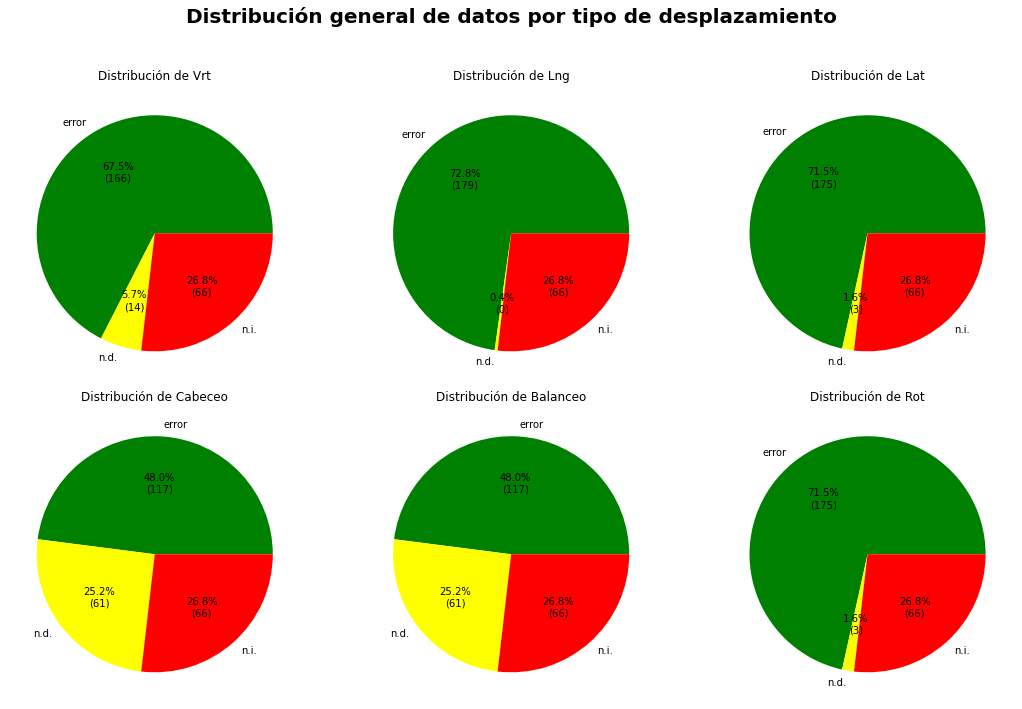

In [6]:
# Gráfico de pastel por cada tipo de desplazamiento
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(aspect="equal"))

# Colores a usar
colores = {"error": "green", "n.d.": "yellow", "n.i.": "red"}

# Función personalizada para el formato de los porcentajes
def func(pct, all_vals):
    total = sum(all_vals)
    val = int(pct / 100 * total)  # Calcula el valor correspondiente al porcentaje
    return f'{pct:.1f}%\n({val})'

for (tipo, ax) in zip(conteo_totales['tipo'].unique(), axs.flatten()):
    data_tipo = conteo_largo[conteo_largo['tipo'] == tipo]
    wedges, texts, autotexts = ax.pie(data_tipo['conteo'], 
                                       labels=data_tipo['tipo_valor'], 
                                       autopct=lambda pct: func(pct, data_tipo['conteo']), 
                                       colors=[colores[val] for val in data_tipo['tipo_valor']])
    
    ax.set_title(f"Distribución de {tipo}")

# Título general
fig.suptitle("Distribución general de datos por tipo de desplazamiento", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el layout para dejar espacio al título
# plt.savefig("pasteles_tipo_general.jpg")
plt.show()

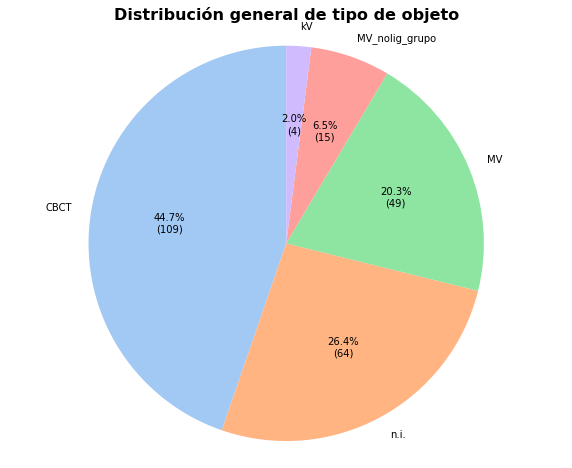

In [7]:
#### Gráfico pasteles general tipo de objeto ####

# Agrupar los objetos "MV_nolig", "MV_nolig_AP" y "MV_nolig_LAT" en una nueva categoría "MV_nolig_grupo"
datos['tipo_objeto'] = datos['tipo_objeto'].replace(
    to_replace=["MV_nolig", "MV_nolig_AP", "MV_nolig_LAT"],
    value="MV_nolig_grupo"
)

# Contar las frecuencias de cada tipo de objeto
df_conteo_objeto = datos['tipo_objeto'].value_counts().reset_index()
df_conteo_objeto.columns = ['Var1', 'Freq']

# Calcular el porcentaje
df_conteo_objeto['porcentaje'] = round(df_conteo_objeto['Freq'] / df_conteo_objeto['Freq'].sum() * 100, 1)

# Crear las etiquetas con cantidad y porcentaje
df_conteo_objeto['etiqueta'] = df_conteo_objeto.apply(
    lambda x: f"{x['Var1']}\n{x['Freq']} ({x['porcentaje']}%)", axis=1)

# Crear el gráfico de pastel con las etiquetas fuera del gráfico
plt.figure(figsize=(10, 8))
plt.pie(df_conteo_objeto['Freq'], labels=df_conteo_objeto['Var1'], 
        startangle=90, colors=sns.color_palette("pastel"), 
        autopct=lambda p: f'{p:.1f}%\n({int(p * df_conteo_objeto["Freq"].sum() / 100)})')
plt.title("Distribución general de tipo de objeto", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig("pastel_objeto.jpg")
plt.show()

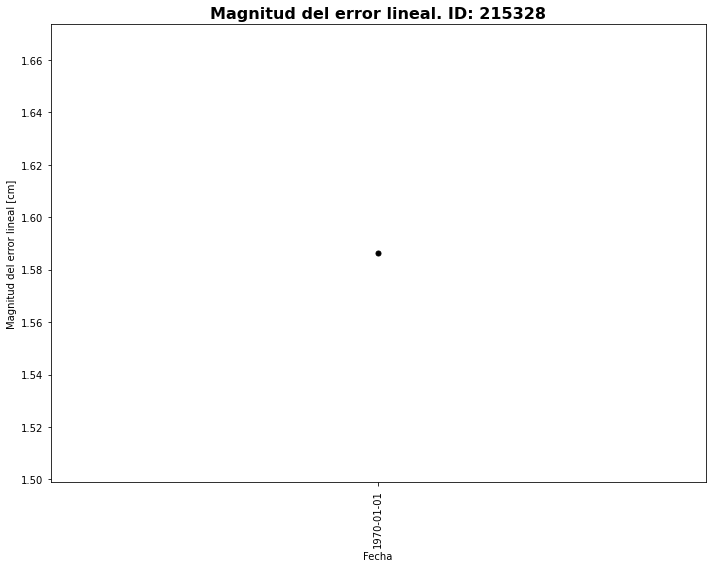

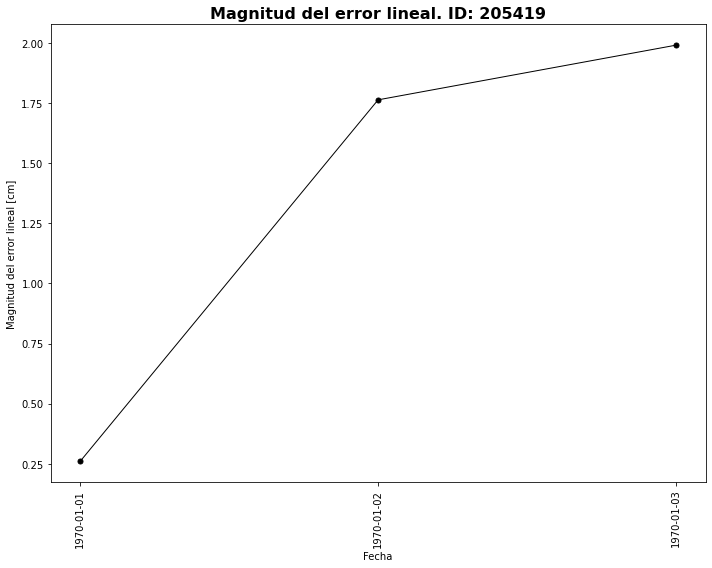

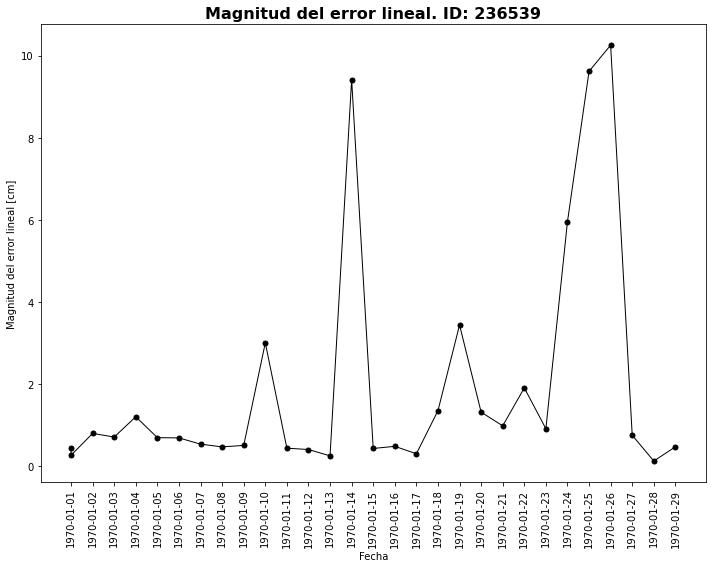

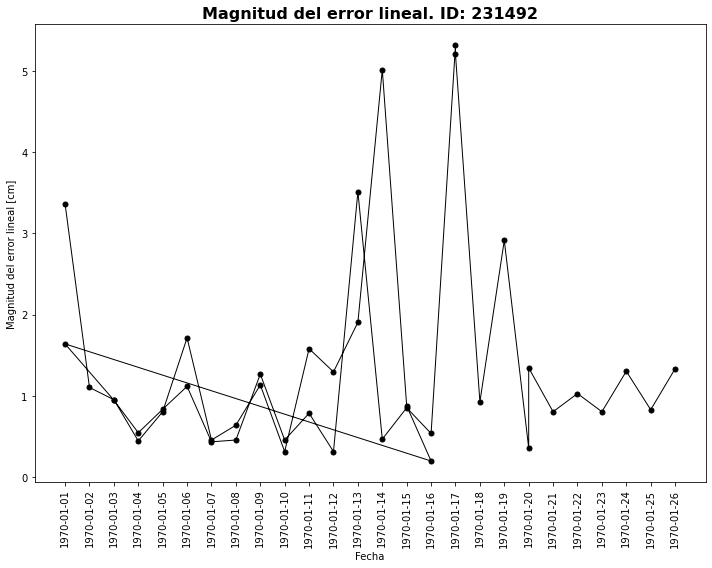

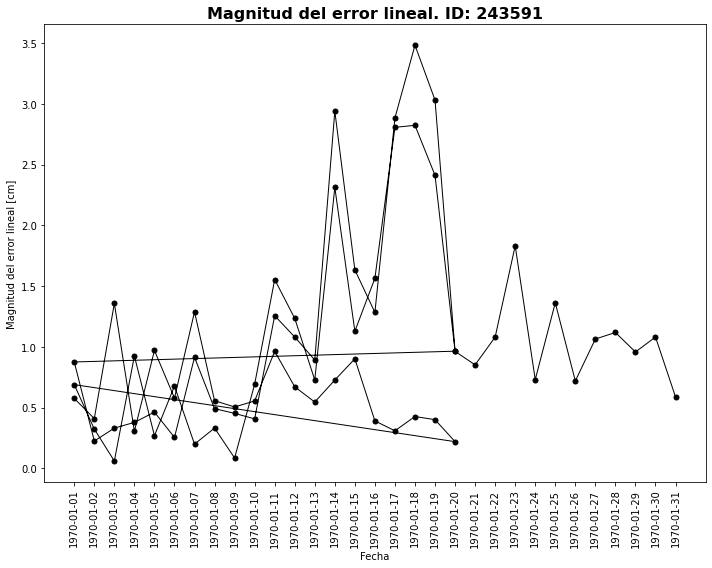

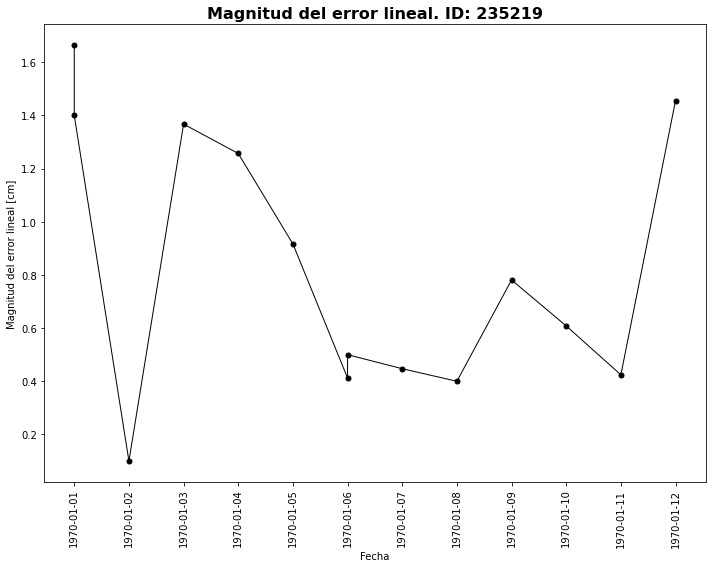

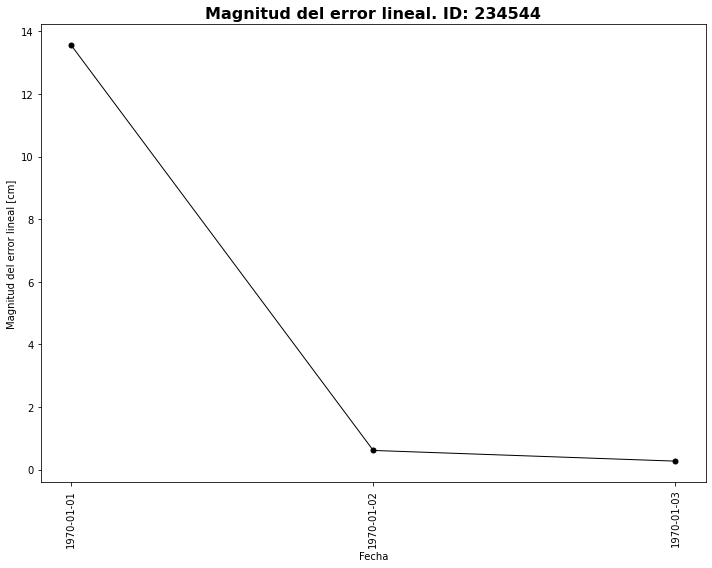

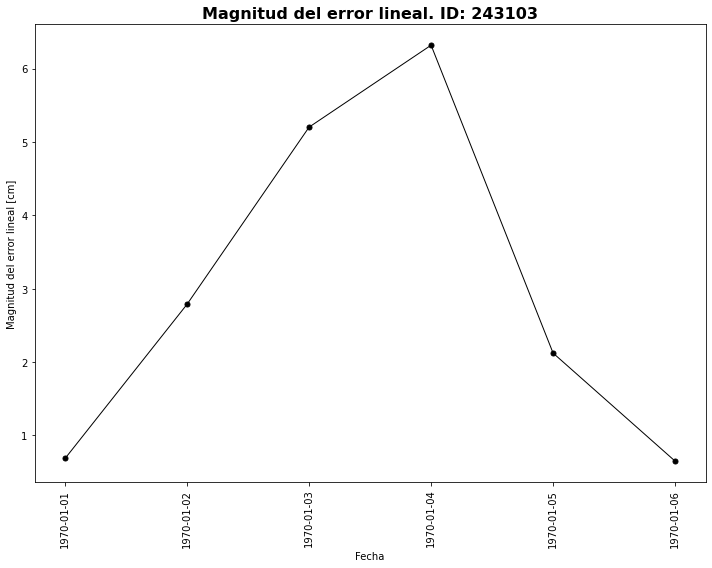

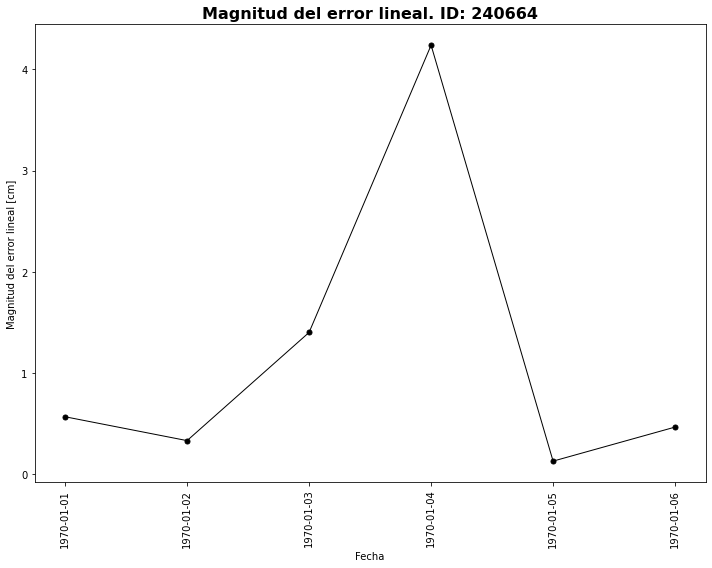

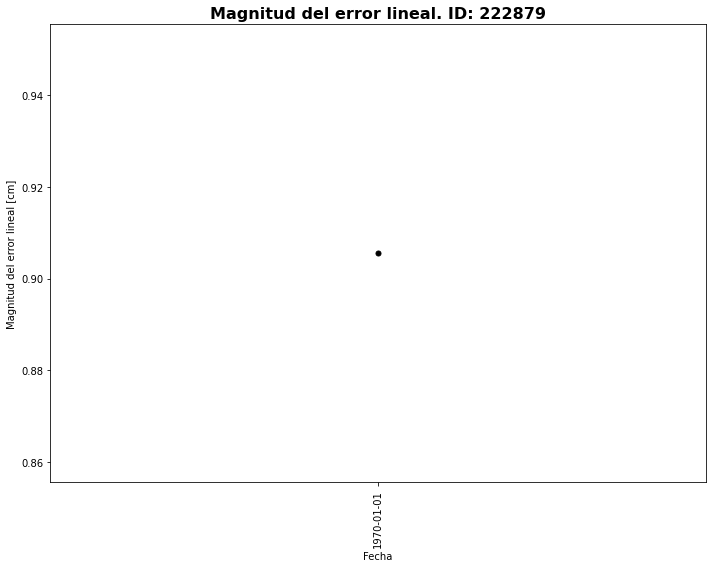

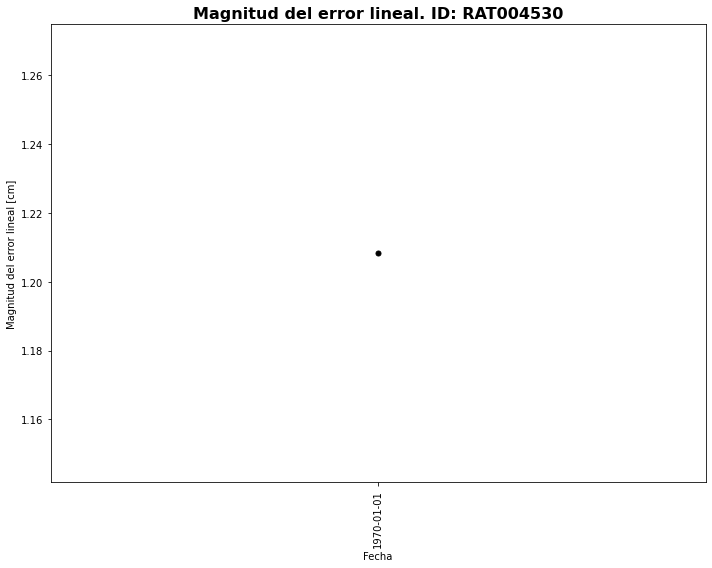

In [9]:
from matplotlib.dates import DateFormatter

# Filtrar los datos y calcular la magnitud lineal
datos['magnitud_lineal'] = np.sqrt(
    np.where(datos['vrt_num'].isna(), 0, datos['vrt_num']**2) +
    np.where(datos['lng_num'].isna(), 0, datos['lng_num']**2) +
    np.where(datos['lat_num'].isna(), 0, datos['lat_num']**2)
)

datos_filtrados = datos.dropna(subset=['vrt_num', 'lng_num', 'lat_num'], how='all')

# Lista de IDs de pacientes
ids_pacientes = datos_filtrados['id'].unique()

for id_f in ids_pacientes:
    datos_paciente = datos_filtrados[datos_filtrados['id'] == id_f]
    
    # Verificar si hay datos después de filtrar NAs
    if not datos_paciente.empty:
        plt.figure(figsize=(10, 8))
        
        # Crear gráfico de magnitud lineal
        plt.plot(datos_paciente['fecha'], datos_paciente['magnitud_lineal'], label='Magnitud Lineal', color='black', linewidth=1)
        plt.scatter(datos_paciente['fecha'], datos_paciente['magnitud_lineal'], color='black', s=25)

        # Personalización del gráfico
        plt.title(f'Magnitud del error lineal. ID: {id_f}', fontsize=16, fontweight='bold')
        plt.xlabel('Fecha')
        plt.ylabel('Magnitud del error lineal [cm]')
        
        # Ajustar el formato de las fechas en el eje x
        plt.xticks(rotation=90)
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
        
        # Eliminar leyenda
        plt.legend().set_visible(False)
        
        # Guardar el gráfico
        plt.tight_layout()
        #plt.savefig(f'grafico_magnitud_lineal_{id_f}.jpg')
        #plt.close()
        plt.show()